In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 5]

given parameters

In [0]:
v_stall=10
v_max=30
ROC_max=6
STO=30
h_c=221.8
r_turn=150

rho0=1.225

rho30ft=1.2
rho=1.13
rho_hmax=1.1
g=9.8
Cd0=0.03
effp = 0.6
AR = 6
K = 1/(np.pi*AR*0.85) 
L_D_max = 10.486
mu=0.04
V_to= 1.2*v_stall

In [0]:
cl_max=1.2

In [0]:
def calc_v_max(w_s):
  num = effp
  den_1 = 0.5*rho0*v_max**3*Cd0/(w_s)
  sigma = rho/rho0
  den_2 = 2*K*w_s/(rho*sigma*v_max)
  w_p = num/(den_1+den_2)  
  return w_p

In [0]:
def calc_hc(w_s):
    num = rho_hmax/rho0
    den_1_1= 2/(rho_hmax*np.sqrt(3*Cd0/K))
    den_1_2 = w_s
    den_2 = 1.155/(effp*L_D_max)
    w_p = num/(np.sqrt(den_1_1*den_1_2)*den_2)
    return w_p


In [0]:
def stall():
    ws= 0.5*rho0*cl_max*(v_stall**2)
    return(ws)

def clr(ws):
    ans=(2*ws)/(rho*((1.2*v_stall)**2))
    return(cl_max/1.21)

def cdg(cl):
    ans= Cd0+K*(cl**2)-mu*cl
    return(0.028)

def takeoffRun(ws):
    cl=clr(ws)
    d1=(mu+cdg(cl)/cl)
    n2=np.exp(0.6*rho30ft*g*cdg(cl)*STO/ws)
    wpn=(1-n2)*effp
    wpd=(mu-d1*n2)*V_to
    wp=wpn/wpd
    return(wp)


def Rate_of_climb(ws):
    wp1=(ROC_max/effp)
    wp2= np.sqrt(2*ws/(rho0*np.sqrt(3*Cd0/K)))
    wp3= 1.155/(L_D_max*effp)
    return(1/(wp1+wp2*wp3))




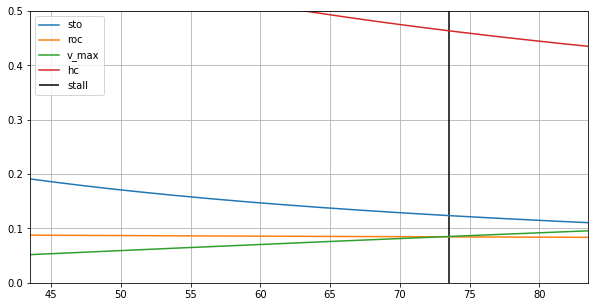

In [0]:
ws = np.linspace(0.1,100,200)
wp4 = calc_v_max(ws)
wp5  = calc_hc(ws)
wp2=takeoffRun(ws)
wp3=Rate_of_climb(ws)
wp1=stall()
plt.vlines(wp1,0,10,label="stall")
plt.plot(ws,wp2,label="sto")
plt.plot(ws,wp3,label="roc")
plt.plot(ws,wp4,label="v_max")
plt.plot(ws,wp5,label="hc")
plt.ylim(0,0.5)
plt.xlim(wp1-30,wp1+10);
plt.legend()
plt.grid()

In [0]:
calc_v_max(wp1)

0.08518617154255866

In [0]:
wp1

73.5